In [20]:
import numpy as np
import math as m
import astropy
import aplpy
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
from astropy.io import fits
from astropy.utils.data import download_file
from astropy.wcs import WCS
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.wcs.utils import skycoord_to_pixel
from astropy.wcs.utils import pixel_to_skycoord
from astropy.utils.data import get_pkg_data_filename
import matplotlib.patheffects as PathEffects

In [21]:
def plotLine(xCoord, yCoord, angle, length, couleur,width):
    #print(np.sin(m.radians(angle)))
    if np.sin(angle) < 0.00000001 and np.sin(angle) > -0.00000001: #if vertical line
        yChange = float(length)
        xChange = 0
        
        yInitial = float(yCoord) - float(yChange/2)
        xInitial = float(xCoord)
        
        yFinal = yInitial + yChange
        
        if yChange <= 1 and yChange > 0:
            yLin = 20
        elif yChange > 1:
            yLin = int(yChange * 2)
           
        yList = np.linspace(yInitial, yFinal, yLin)
        xList = [xCoord]*yLin
        
        #print(xList,yList)
        
    else: #not vertical line 
        #print(np.sin(angle), length)
        xChange = float(np.sin(angle)) * float(length)
        yChange = float(np.cos(angle)) * float(length)
        #print("xChange is",xChange)
        xInitial = float(xCoord) - float(xChange/2)
        yInitial = float(yCoord) - float(yChange/2)
    
        xFinal = xInitial + xChange
        slope = 1/np.tan(angle)
        
        #print(slope)
        
        y0 = yCoord - slope*xCoord
        
        if xChange < 0:
            xChange = xChange *-1
            
        
        if xChange <= 1 and xChange > 0:
            xLin = 20
        elif xChange > 1:
            xLin = int(xChange * 2)
        else:
            xLin = 20

    
        xList = np.linspace(xInitial, xFinal, xLin)
        yList = [slope*i + y0 for i in xList]
        
        
        
        
    #print(np.cos(angle))
    #print(xChange, yChange)
    #print(xList, yList, yInitial, yFinal)
    plt.plot(xList, yList, color=couleur, linewidth = width, path_effects=[PathEffects.withStroke(linewidth=2.5,
                                                                                  foreground="black")])

In [22]:
def plotLineList(RaList, DecList, wcs, angleList, lengthList, couleur,width):
    for i in range(0,len(RaList)):
        #print(RaList[i],DecList[i],angleList[i],lengthList[i])
        #print(abs(lengthList[i]/100))
        plotLine(RaList[i],DecList[i],-1*angleList[i]+np.pi/2,abs(lengthList[i])/5,couleur,width)

In [23]:
Ihdu_list = fits.open('l483_iext_mJysqa_8as.fits')
Ihdu = fits.open('l483_iext_mJysqa_8as.fits')[0]
Iwcs = WCS(Ihdu.header)
#Ihdu.header
Iimage_data = Ihdu_list[0].data

IVar = Ihdu_list[1].data


IData = []
IPolData = []
for i in range(0, len(Iimage_data[0])):
    for j in range(0, len(Iimage_data[0][i])):
        IPolData.append([j,i,Iimage_data[0][i][j]])
        IData.append(Iimage_data[0][i][j])
        
IVarData = []
for i in range(0, len(IVar[0])):
    for j in range(0, len(IVar[0][i])):
        IVarData.append([j,i,IVar[0][i][j]])
        

        
        
Qhdu_list = fits.open('l483_qext_mJysqa_8as.fits')
Qhdu = fits.open('l483_qext_mJysqa_8as.fits')[0]
Qwcs = WCS(Qhdu.header)
#Qhdu.header
Qimage_data = Qhdu_list[0].data

QVar = Qhdu_list[1].data

QData = []
QPolData = []
for i in range(0, len(Qimage_data[0])):
    for j in range(0, len(Qimage_data[0][i])):
        #print([i,j,Qimage_data[0][i][j]])
        QPolData.append([j,i,Qimage_data[0][i][j]])
        QData.append(Qimage_data[0][i][j])

QVarData = []
for i  in range(0, len(QVar[0])):
    for j in range(0, len(QVar[0][i])):
        #print([i,j,QVar[0][i][j]])
        QVarData.append([j,i,QVar[0][i][j]])
        
        

        
Uhdu_list = fits.open('l483_uext_mJysqa_8as.fits')
Uhdu = fits.open('l483_uext_mJysqa_8as.fits')[0]
Uwcs = WCS(Uhdu.header)
#Uhdu.header
Uimage_data = Uhdu_list[0].data

UVar = Uhdu_list[1].data


UData = []
UPolData = []
for i in range(0, len(Uimage_data[0])):
    for j in range(0, len(Uimage_data[0][i])):
        UPolData.append([j,i,Uimage_data[0][i][j]])
        UData.append(Uimage_data[0][i][j])
        
UVarData = []
for i in range(0, len(UVar[0])):
    for j in range(0, len(UVar[0][i])):
        UVarData.append([j,i,UVar[0][i][j]])
        
        
        
        
        
PolDataC = []
for i in range(0,len(QPolData)):
    PolDataC.append([QPolData[i][0],QPolData[i][1],IPolData[i][2],QPolData[i][2],UPolData[i][2]])
    
PolVar = []
for i in range(0,len(QVarData)):
    PolVar.append([QVarData[i][0],QVarData[i][1],IVarData[i][2],QVarData[i][2],UVarData[i][2]])
    
sigI=0.02718023855912932

Set OBSGEO-B to    19.822855 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [24]:
QPhdu = fits.open('PlanckMap.fits')[1]
UPhdu = fits.open('PlanckMap.fits')[2]

QPwcs = WCS(QPhdu.header)
UPwcs = WCS(UPhdu.header)

QPimage_data = QPhdu.data
UPimage_data = UPhdu.data


QPPolData = []
for i in range(0, len(QPimage_data)):
    for j in range(0, len(QPimage_data[i])):
        QPPolData.append([j,i,QPimage_data[i][j]])
        
UPPolData = []
for i in range(0, len(UPimage_data)):
    for j in range(0, len(UPimage_data[i])):
        UPPolData.append([j,i,UPimage_data[i][j]])

MAP_EXT Original map extension                                                   [astropy.io.fits.card]


In [25]:
PolData = []
for i in range(0,len(PolDataC)):
    #print(PolDataC[i][3])
    #print(np.isnan(PolDataC[i][3]))
    if np.isnan(PolDataC[i][3]) == False:
        
        IPVar = np.sqrt(((PolDataC[i][3]*np.sqrt(PolVar[i][3]))**2+(PolDataC[i][4]*np.sqrt(PolVar[i][4]))**2)/(PolDataC[i][3]**2+PolDataC[i][4]**2))
        IPol = np.sqrt(PolDataC[i][3]**2+PolDataC[i][4]**2-IPVar**2)
        
        
        coef = 100/abs(PolDataC[i][2])
        polFrac = coef*IPol
        PVar = polFrac*np.sqrt((IPVar/IPol)**2+(np.sqrt(PolVar[i][2])/PolDataC[i][2])**2)
        
        polAng = 0.5*np.arctan2(PolDataC[i][4],PolDataC[i][3])
                   
        angVar = 0.5*np.sqrt((PolDataC[i][3]*np.sqrt(PolVar[i][3]))**2+(PolDataC[i][4]*np.sqrt(PolVar[i][4]))**2)/(PolDataC[i][3]**2+PolDataC[i][4]**2)
        
        
        PolData.append([PolDataC[i][0],PolDataC[i][1],PolDataC[i][2],PolVar[i][2],polFrac,PVar,polAng,angVar,IPol,IPVar]) 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


In [26]:
PlanckData = []
for i in range(len(QPPolData)):
    skycoords = pixel_to_skycoord(QPPolData[i][0],QPPolData[i][1],QPwcs,0)
    pixcoords = skycoord_to_pixel(skycoords,Iwcs,0)
    if pixcoords[0] > 0 and pixcoords[0] < 120 and pixcoords[1] > 0 and pixcoords[1] < 120:
        polAng = 0.5*np.arctan2(-UPPolData[i][2],QPPolData[i][2])
        PlanckData.append([float(pixcoords[0]),float(pixcoords[1]),8,polAng])


In [27]:
pixelRaPlanck=[]
pixelDecPlanck=[]
angleListPlanck=[]
lengthListPlanck=[]
angleListPlanckDeg=[]
PlanckList = PlanckData[1::2]
for i in range(len(PlanckList)):
    print(PlanckData[i])
    pixelRaPlanck.append(PlanckList[i][0])
    pixelDecPlanck.append(PlanckList[i][1])
    lengthListPlanck.append(PlanckList[i][2])
    angleListPlanck.append(PlanckList[i][3])


[2.9420531670307213, 12.140751196684946, 8, -0.44389525055885315]
[8.933945210448108, 0.8015863377276986, 8, -0.4213806688785553]
[2.2974546335182, 40.81099013042309, 8, -0.4771079421043396]
[8.289374531207493, 29.471874121617475, 8, -0.4844273328781128]
[14.281276795104468, 18.13274733560519, 8, -0.5167590975761414]
[20.27316587295983, 6.793601355530306, 8, -0.4709131121635437]
[1.6527551073626725, 69.48114370713816, 8, -0.50371915102005]
[7.644710909962619, 58.14203414510119, 8, -0.49490800499916077]
[13.63664298905094, 46.80293212205237, 8, -0.5399149060249329]
[19.628555792346106, 35.463829221185776, 8, -0.5545692443847656]
[25.62045376753521, 24.124717025692306, 8, -0.5167590975761414]
[31.612341362276418, 12.785587118763196, 8, -0.5432846546173096]
[37.604223024208835, 1.4464310835176803, 8, -0.5079354643821716]
[1.007952195937996, 98.15131833385706, 8, -0.44963327050209045]
[6.999951954622411, 86.81217281537965, 8, -0.5048152208328247]
[12.991921899740518, 75.47305315218068, 8, 

In [28]:
PolData4 = []
PolData2 = []
PolDataNormAng2 = []
PolDataNormAng4 = []
for i in range(len(PolData)):
    if PolData[i][2] > 10*sigI:
        if m.degrees(PolData[i][7]) < 10:
            if PolData[i][8] > 4*PolData[i][9]:
                if PolData[i][5] <5:
                    PolDataNormAng4.append([PolData[i][0],PolData[i][1],5,PolData[i][6]])
                    PolData4.append([PolData[i][0],PolData[i][1],PolData[i][4],PolData[i][6]])
                
            elif PolData[i][8] > 3*PolData[i][9]:
                if PolData[i][5] < 5:
                    PolData2.append([PolData[i][0],PolData[i][1],PolData[i][4],PolData[i][6]])
                    if PolData[i][8] > 3*PolData[i][9]:
                        PolDataNormAng2.append([PolData[i][0],PolData[i][1],5,PolData[i][6]])
                
              
            
pixelRaNormAng2=[]
pixelDecNormAng2=[]
angleListNormAng2=[]
lengthListNormAng2=[]
for i in range(len(PolDataNormAng2)):
    pixelRaNormAng2.append(PolDataNormAng2[i][0])
    pixelDecNormAng2.append(PolDataNormAng2[i][1])
    lengthListNormAng2.append(PolDataNormAng2[i][2])
    angleListNormAng2.append(PolDataNormAng2[i][3])

pixelRaNormAng4=[]
pixelDecNormAng4=[]
angleListNormAng4=[]
lengthListNormAng4=[]
for i in range(len(PolDataNormAng4)):
    pixelRaNormAng4.append(PolDataNormAng4[i][0])
    pixelDecNormAng4.append(PolDataNormAng4[i][1])
    lengthListNormAng4.append(PolDataNormAng4[i][2])
    angleListNormAng4.append(PolDataNormAng4[i][3])
    
    
pixelRa4=[]
pixelDec4=[]
angleList4=[]
lengthList4=[]
for i in range(len(PolData4)):
    pixelRa4.append(PolData4[i][0])
    pixelDec4.append(PolData4[i][1])
    lengthList4.append(PolData4[i][2])
    angleList4.append(PolData4[i][3])

    
pixelRa2=[]
pixelDec2=[]
angleList2=[]
lengthList2=[]
for i in range(len(PolData2)):
    pixelRa2.append(PolData2[i][0])
    pixelDec2.append(PolData2[i][1])
    lengthList2.append(PolData2[i][2])
    angleList2.append(PolData2[i][3])

INFO: Setting slices=[0] [aplpy.core]
INFO: Auto-setting vmin to -7.971e-01 [aplpy.core]
INFO: Auto-setting vmax to  1.368e+00 [aplpy.core]


<Figure size 720x720 with 0 Axes>

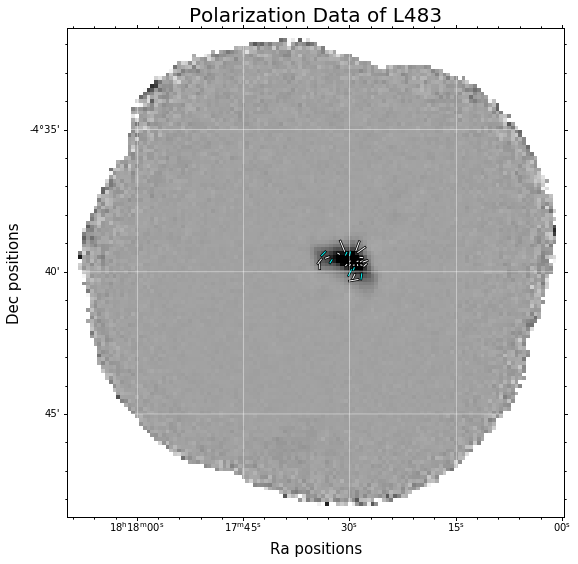

In [29]:
fig = plt.figure(figsize=(10, 10))
image = aplpy.FITSFigure('l483_iext_mJysqa_8as.fits')
image.add_grid()
#image.Colorbar()
image.show_colorscale(cmap='binary')



#plt.figure(figsize(15,15))
#overlay = ax.get_coords_overlay('fk5')
#overlay.grid(color='white', ls='dotted')
#plt.imshow(hdu.data, origin='lower')

plt.title('Polarization Data of L483',fontsize = 20)
#plt.xlim([50,90])
#plt.ylim([47,87])
plt.xlabel('Ra positions',fontsize = 15)
plt.ylabel('Dec positions',fontsize = 15)
#plotlineSky(290,385,0,5, 'white')
#plt.text(288,378,'5%',color='white',fontsize = 15 )
plotLineList(pixelRa2, pixelDec2, Iwcs, angleList2, lengthList2, 'white',1)
plotLineList(pixelRa4, pixelDec4, Iwcs, angleList4, lengthList4, 'cyan',1)
#plt.colorbar()
#plt.colorbar()
plt.show()

INFO: Setting slices=[0] [aplpy.core]


Set OBSGEO-B to    19.822855 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


INFO: Auto-setting vmin to -6.851e-01 [aplpy.core]
INFO: Auto-setting vmax to  1.591e+00 [aplpy.core]


<Figure size 720x720 with 0 Axes>

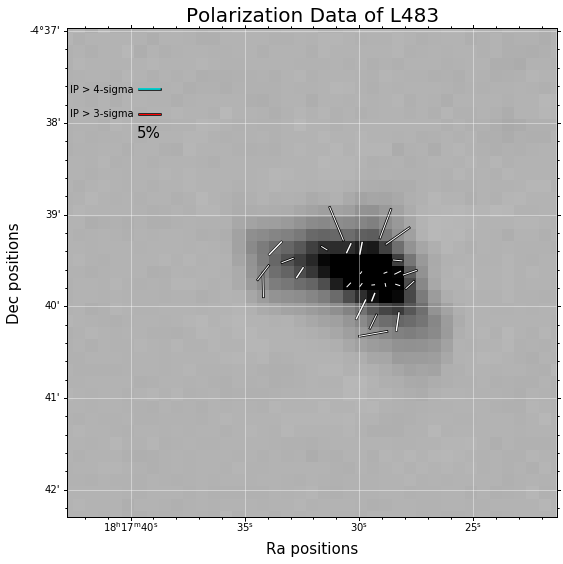

In [30]:
fig = plt.figure(figsize=(10, 10))
image = aplpy.FITSFigure('l483_iext_mJysqa_8as.fits')
image.add_grid()
#image.Colorbar()
image.show_colorscale(cmap='binary')
#image.show_grayscale()

plt.text(50.2,79.7,'IP > 3-sigma',color='black',fontsize=10)
plotLine(56.7,80,m.radians(90),5/3, 'red',1)

plt.text(50.2,81.7,'IP > 4-sigma',color='black',fontsize=10)
plotLine(56.7,82,m.radians(90),5/3, 'cyan',1.5)

plt.text(55.7,78,'5%',color='black',fontsize = 15 )




#plt.figure(figsize(15,15))
#overlay = ax.get_coords_overlay('fk5')
#overlay.grid(color='white', ls='dotted')
#plt.imshow(hdu.data, origin='lower')

plt.title('Polarization Data of L483',fontsize = 20)
plt.xlim([50,90])
plt.ylim([47,87])
plt.xlabel('Ra positions',fontsize = 15)
plt.ylabel('Dec positions',fontsize = 15)
#plotlineSky(290,385,0,5, 'white')
#plt.text(288,378,'5%',color='white',fontsize = 15 )
#plotLineList(pixelRaIP, pixelDecIP, Iwcs, angleListIP, lengthListIP, 'red')
#plotLineList(pixelRaAng, pixelDecAng, Iwcs, angleListAng, lengthListAng, 'black')
plotLineList(pixelRa2, pixelDec2, Iwcs, angleList2, lengthList2, 'white',1)
plotLineList(pixelRa4, pixelDec4, Iwcs, angleList4, lengthList4, 'white',1.5)
#plt.colorbar()
plt.show()

In [31]:
outCoords = SkyCoord('18h17m29.93s','-4d39m39.6s',frame='fk5')
pixCoords = skycoord_to_pixel(outCoords,Iwcs)

In [32]:
pixRaOut = pixCoords[0]
pixDecOut = pixCoords[1]
lengthOut =  20
angleOut = m.radians(105)


INFO: Setting slices=[0] [aplpy.core]


Set OBSGEO-B to    19.822855 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


INFO: Auto-setting vmin to -8.170e-01 [aplpy.core]
INFO: Auto-setting vmax to  1.289e+00 [aplpy.core]


<Figure size 720x720 with 0 Axes>

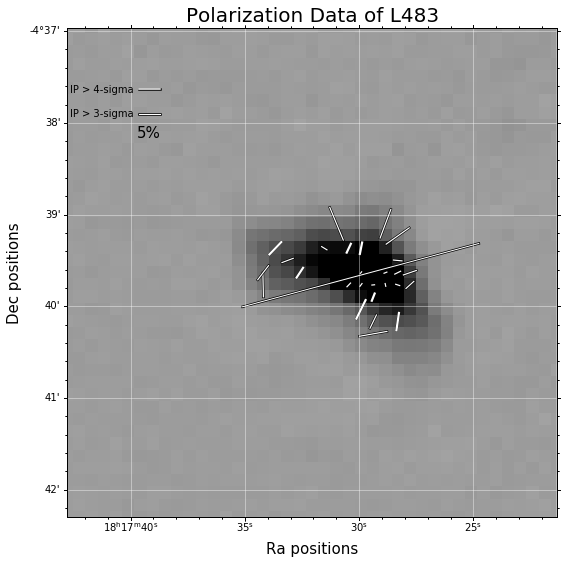

In [33]:
fig = plt.figure(figsize=(10, 10))
image = aplpy.FITSFigure('l483_iext_mJysqa_8as.fits')
image.add_grid()
#image.Colorbar()

image.show_colorscale(cmap='binary')
#image.show_grayscale()

plt.text(50.2,79.7,'IP > 3-sigma',color='black',fontsize=10)
plotLine(56.7,80,m.radians(90),5/3, 'white',1)

plt.text(50.2,81.7,'IP > 4-sigma',color='black',fontsize=10)
plotLine(56.7,82,m.radians(90),5/3, 'white',1.5)

plt.text(55.7,78,'5%',color='black',fontsize = 15 )




#plt.figure(figsize(15,15))
#overlay = ax.get_coords_overlay('fk5')
#overlay.grid(color='white', ls='dotted')
#plt.imshow(hdu.data, origin='lower')

plt.title('Polarization Data of L483',fontsize = 20)
plt.xlim([50,90])
plt.ylim([47,87])
plt.xlabel('Ra positions',fontsize = 15)
plt.ylabel('Dec positions',fontsize = 15)
#plotlineSky(290,385,0,5, 'white')
#plt.text(288,378,'5%',color='white',fontsize = 15 )
#plotLineList(pixelRaIP, pixelDecIP, Iwcs, angleListIP, lengthListIP, 'red')
#plotLineList(pixelRaAng, pixelDecAng, Iwcs, angleListAng, lengthListAng, 'black')
plotLineList(pixelRa2, pixelDec2, Iwcs, angleList2, lengthList2, 'white',1.2)
plotLineList(pixelRa4, pixelDec4, Iwcs, angleList4, lengthList4, 'white',2.2)
plotLine(pixRaOut,pixDecOut,-angleOut,lengthOut,'white',1)
#plt.colorbar()
plt.show()

In [34]:
def plotArrow(xCoord,yCoord,angle,length):
    #print(np.sin(m.radians(angle)))
    if np.sin(angle) < 0.00000001 and np.sin(angle) > -0.00000001: #if vertical line
        yChange = abs(float(length))
        xChange = 0
        
        yInitial = float(yCoord) - float(yChange/2)
        xInitial = float(xCoord)
        
        xFinal = xInitial + xChange
        yFinal = yInitial + yChange
        #print(xList,yList)
        
    else: #not vertical line 
        #print(np.sin(angle), length)
        xChange = abs(float(np.sin(angle)) * float(length))
        yChange = abs(float(np.cos(angle)) * float(length))
        #print("xChange is",xChange)
        xInitial = float(xCoord) - float(xChange/2)
        yInitial = float(yCoord) - float(yChange/2)
        
        xFinal = xInitial + xChange
        yFinal = yInitial + yChange    
        
        
        
    
    #print(np.cos(angle))
    #print(xChange, yChange)
    #print(xList, yList, yInitial, yFinal)
    plt.arrow(xCoord, yCoord, xChange/2,yChange/2,width=0.01,head_width=1,color='blue')
    plt.arrow(xCoord, yCoord, -xChange/2,-yChange/2,width=0.01,head_width=1,color='red')

INFO: Setting slices=[0] [aplpy.core]


Set OBSGEO-B to    19.822855 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


INFO: Auto-setting vmin to -6.630e-01 [aplpy.core]
INFO: Auto-setting vmax to  1.199e+00 [aplpy.core]


<Figure size 720x720 with 0 Axes>

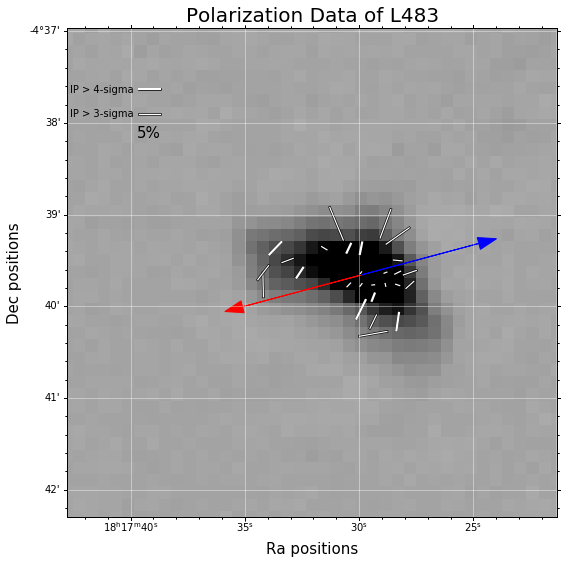

In [35]:
fig = plt.figure(figsize=(10, 10))
image = aplpy.FITSFigure('l483_iext_mJysqa_8as.fits')
image.add_grid()
#image.Colorbar()
image.show_colorscale(cmap='binary')
#image.show_grayscale()

plt.text(50.2,79.7,'IP > 3-sigma',color='black',fontsize=10)
plotLine(56.7,80,m.radians(90),5/3, 'white',1.2)

plt.text(50.2,81.7,'IP > 4-sigma',color='black',fontsize=10)
plotLine(56.7,82,m.radians(90),5/3, 'white',2)

plt.text(55.7,78,'5%',color='black',fontsize = 15 )





#plt.figure(figsize(15,15))
#overlay = ax.get_coords_overlay('fk5')
#overlay.grid(color='white', ls='dotted')
#plt.imshow(hdu.data, origin='lower')

plt.title('Polarization Data of L483',fontsize = 20)
plt.xlim([50,90])
plt.ylim([47,87])
plt.xlabel('Ra positions',fontsize = 15)
plt.ylabel('Dec positions',fontsize = 15)
#plotlineSky(290,385,0,5, 'white')
#plt.text(288,378,'5%',color='white',fontsize = 15 )
#plotLineList(pixelRaIP, pixelDecIP, Iwcs, angleListIP, lengthListIP, 'red')
#plotLineList(pixelRaAng, pixelDecAng, Iwcs, angleListAng, lengthListAng, 'black')
plotLineList(pixelRa2, pixelDec2, Iwcs, angleList2, lengthList2, 'white',1.2)
plotLineList(pixelRa4, pixelDec4, Iwcs, angleList4, lengthList4, 'white',2.2)

plotArrow(pixRaOut,pixDecOut,-angleOut,lengthOut)
#plt.colorbar()
plt.show()

INFO: Setting slices=[0] [aplpy.core]


Set OBSGEO-B to    19.822855 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


INFO: Auto-setting vmin to -8.595e-01 [aplpy.core]
INFO: Auto-setting vmax to  1.742e+00 [aplpy.core]


<Figure size 720x720 with 0 Axes>

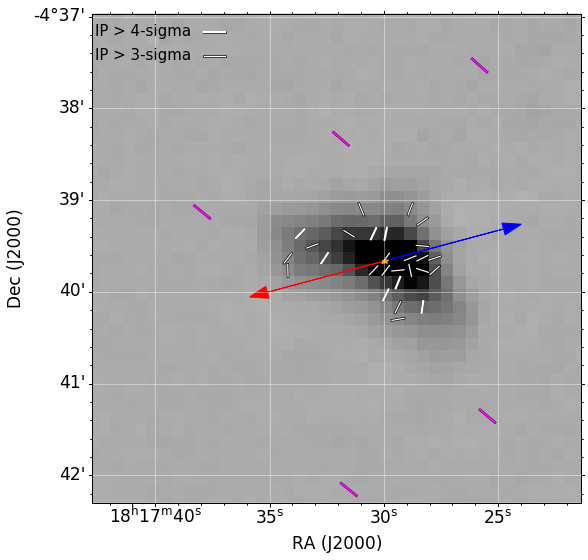

In [40]:
fig = plt.figure(figsize=(10, 10))
image = aplpy.FITSFigure('l483_iext_mJysqa_8as.fits')
image.add_grid()
image.show_colorscale(cmap='binary')


plt.text(50.2,83.2,'IP > 3-sigma',color='black',fontsize=15)
plotLine(60,83.5,m.radians(90),5/3, 'white',1.2)

plt.text(50.2,85.2,'IP > 4-sigma',color='black',fontsize=15)
plotLine(60,85.5,m.radians(90),5/3, 'white',2.2)


#plt.title('Polarization Data of L483',fontsize = 20)
plt.rcParams.update({'font.size':17})
plt.xlim([50,90])
plt.ylim([47,87])
plt.xlabel('RA (J2000)',fontsize = 17)
plt.ylabel('Dec (J2000)',fontsize = 17)

plotLineList(pixelRaNormAng2, pixelDecNormAng2, Iwcs, angleListNormAng2, lengthListNormAng2, 'white',1.2)
plotLineList(pixelRaNormAng4, pixelDecNormAng4, Iwcs, angleListNormAng4, lengthListNormAng4, 'white',2.2)
plotLineList(pixelRaPlanck, pixelDecPlanck, Iwcs, angleListPlanck, lengthListPlanck, 'magenta',2)
plotArrow(pixRaOut,pixDecOut,-angleOut,lengthOut)
plt.plot(pixRaOut,pixDecOut, marker = '*', color  = 'orange')
plt.savefig('fin_image_3sig.png')
plt.show()